##### 3. How to define economic welfare?

In [1]:
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
import os

In [53]:
def split_dataframe(df):
    year1 = [year for year in range(1980,2001)]
    year2 =  [year for year in range(2001,2023)]
    df_80 = pd.DataFrame(data=None)
    df_20 = pd.DataFrame(data=None)

    for year1,year2 in zip(year1,year2):

        dummy_df = df.loc[df['year']==year1].copy()
        df_80 = pd.concat([df_80,dummy_df],ignore_index=True)

        dummy_df = df.loc[df['year']==year2].copy()
        df_20 = pd.concat([df_20,dummy_df],ignore_index=True)

    return df_80, df_20

In [54]:
def to_dataframe(series_object,column_name):
    
    df = pd.DataFrame(data=series_object,columns=column_name)
    df['date'] = df.index
    df.reset_index(drop=True,inplace=True)
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year

    return df

In [114]:
def plot_data(df_80,df_20,column_name):
    
    plt.figure(figsize=(10,3))

    plt.subplot(121)
    plt.plot(df_80['date'],df_80[column_name],'k-')
    plt.title(f'%change in {column_name} from 1980-2000',loc='center',fontsize=9,
    color='green')


    plt.subplot(122)
    plt.plot(df_20['date'],df_20[column_name],'k-')
    plt.title(f'%change in {column_name} 2001-2021',loc='center',fontsize=9,
    color='green')

    return plt

In [5]:
fred_data = Fred(api_key=os.environ.get('FRED_API_KEY'))

In [8]:
#extracting GDP per capita
gdpc = fred_data.get_series('A939RX0Q048SBEA')

In [11]:
gdpc_df = pd.DataFrame(data=gdpc,columns=['percapita'])
gdpc_df['date'] = gdpc_df.index
gdpc_df.reset_index(drop=True,inplace=True)
gdpc_df['date'] = pd.to_datetime(gdpc_df['date'])
gdpc_df['year'] = gdpc_df['date'].dt.year

In [13]:
year1 = [year for year in range(1980,2001)]
year2 =  [year for year in range(2001,2023)]
gdpc_80 = pd.DataFrame(data=None)
gdpc_20 = pd.DataFrame(data=None)

for year1,year2 in zip(year1,year2):

    dummy_df = gdpc_df.loc[gdpc_df['year']==year1].copy()
    gdpc_80 = pd.concat([gdpc_80,dummy_df],ignore_index=True)

    dummy_df = gdpc_df.loc[gdpc_df['year']==year2].copy()
    gdpc_20 = pd.concat([gdpc_20,dummy_df],ignore_index=True)


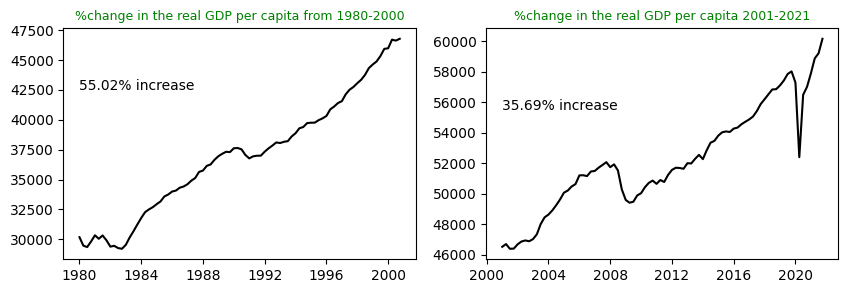

In [43]:
plt.figure(figsize=(10,3))

plt.subplot(121)
plt.plot(gdpc_80['date'],gdpc_80['percapita'],'k-')

diff = gdpc_80['percapita'][gdpc_80.shape[0]-1]-gdpc_80['percapita'][0]
asperc = (diff/gdpc_80['percapita'][0])*100
plt.text(gdpc_80['date'][0], 42500, s=f'{asperc :.2f}% increase')
plt.title('%change in the real GDP per capita from 1980-2000',loc='center',fontsize=9,
color='green')


plt.subplot(122)
plt.plot(gdpc_20['date'],gdpc_20['percapita'],'k-')

diff2 = gdpc_20['percapita'][gdpc_20.shape[0]-1]-gdpc_20['percapita'][0]
asperc2 = (diff/gdpc_20['percapita'][0])*100
plt.text(gdpc_20['date'][0], 55500, s=f'{asperc2 :.2f}% increase')
plt.title('%change in the real GDP per capita 2001-2021',loc='center',fontsize=9,
color='green')


plt.show()

##### From the above chart it is clear that the growth in gdp per capita is lower in 2001-2021 periods. this might be due to financial crisis and pandemic. but, the overall increase has been less compared to the 1980-2000 period. we can say that 1980-2000 period was more prosperous than 2001-2021 period.

In [44]:
#cpi data

cpi = fred_data.get_series('CORESTICKM159SFRBATL')

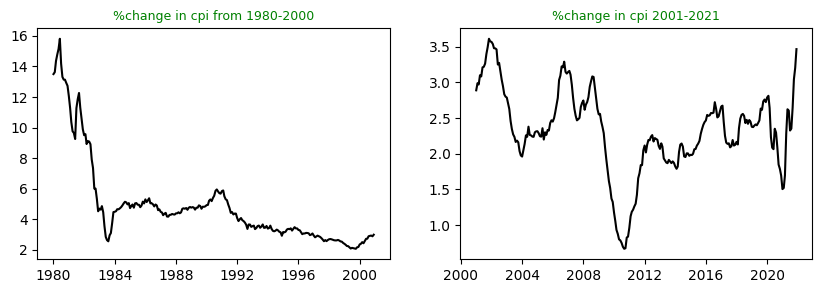

In [111]:
cpi_df = to_dataframe(cpi,['cpi'])
cpi_80, cpi_20 = split_dataframe(cpi_df)
plt = plot_data(cpi_80,cpi_20,'cpi',y1=8,y2=1.5)
plt.show()

In [112]:
#umemployment rate

uemp = fred_data.get_series('UNRATE')

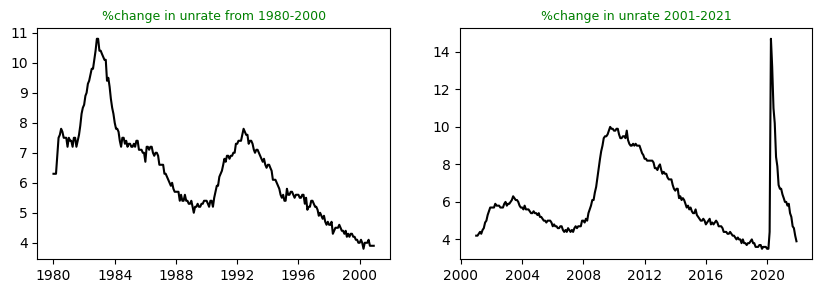

In [117]:
unemp_df = to_dataframe(uemp,column_name=['unrate'])
uemp_80, uemp_20 = split_dataframe(unemp_df)
plt = plot_data(uemp_80,uemp_20,column_name='unrate')
plt.show()

In [118]:
#industrial production

indprod = fred_data.get_series('INDPRO')

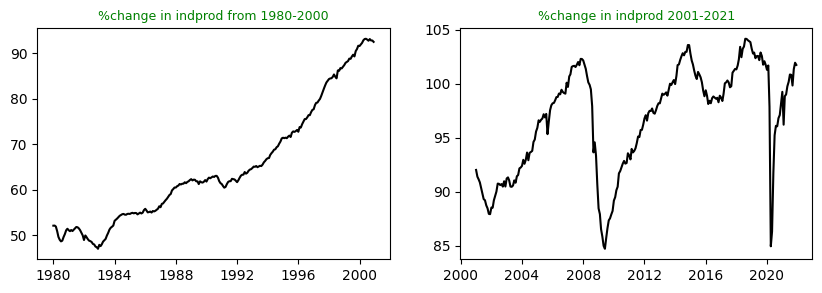

In [119]:
iprod_df = to_dataframe(indprod,['indprod'])
idf_80,idf_20 = split_dataframe(iprod_df)
plt = plot_data(idf_80,idf_20,column_name='indprod')
plt.show()

In [120]:
#govt spending

fexp = fred_data.get_series('FGEXPND')

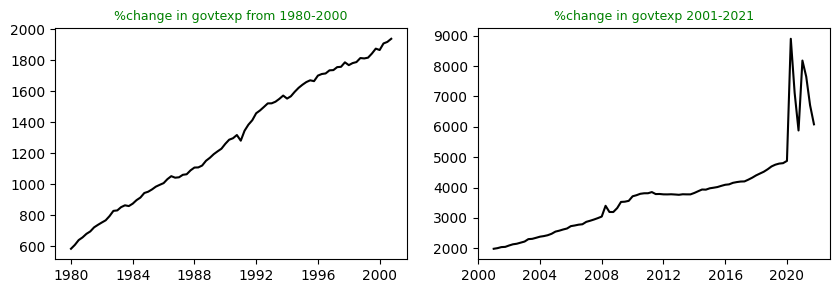

In [121]:
fexp_df = to_dataframe(fexp,column_name=['govtexp'])
fexp_80, fexp_20 = split_dataframe(fexp_df)
plt = plot_data(fexp_80,fexp_20,column_name='govtexp')

##### From the above plots, the welfare can be defined with low inflation rates, low unemployment rates, good industrial production.